In [1]:
import datetime as dt
import pandas as pds
import pysat

def print_range(inst):
    """Print loaded data range"""
    print('Loaded Data Range: ')
    print(inst.index[0], ' --- ', inst.index[-1], '\n\n')

# The following set up a few test conditions, run one, then execute the 'Testing Load Behaviors' cell below.


In [2]:
# basic instrument setup
inst = pysat.Instrument('pysat', 'testing')
verify = False

In [6]:
# instrument setup with data padding
inst = pysat.Instrument('pysat', 'testing', pad={'minutes': 5})
verify = True

In [2]:
# instrument setup with longer data padding
inst = pysat.Instrument('pysat', 'testing', pad={'minutes': 5, 'days': 1})
verify = True

In [8]:
# instrument setup with multi_file_day
inst = pysat.Instrument('pysat', 'testing', multi_file_day=True)
verify = True

# Testing Load Behaviors

In [9]:
# load by yr, doy
try:
    print('load command via yr, doy: ', '2009, 1')
    inst.load(2009, 1, verifyPad=verify)
    print_range(inst)
except ValueError as err:
    print(err, '\n')

# inclusive/exclusive syntax for loading over a range of dates
print('load command via yr, doy pairs: ', '2009, 1, 2009, 3')
inst.load(2009, 1, 2009, 3, verifyPad=verify)
print_range(inst)

# load by date
try:
    date = dt.datetime(2009, 1, 1)
    print('load command via date: ', date)
    inst.load(date=date, verifyPad=verify)
    print_range(inst)
except ValueError as err:
    print(err, '\n')


# load by range of dates
date = dt.datetime(2009, 1, 1)
date2 = dt.datetime(2009, 1, 3)
print('load command via dates: ', date, ', ', date2)
# inclusive/exclusive syntax for loading over a range of dates
inst.load(date=date, date2=date2, verifyPad=verify)
print_range(inst)

# load by filename
try:
    fname = inst.files[366]
    print('Load via filename: ', fname)
    inst.load(fname=fname, verifyPad=verify)
    print_range(inst)
except ValueError as err:
    print(err, '\n')


# load by filenames
try:
    fname = inst.files[366]
    fname2 = inst.files[367]
    # inclusinve syntax for filenames, start and end
    print('Load via filenames: ', fname, ', ', fname2)
    inst.load(fname=fname, fname2=fname2, verifyPad=verify)
    print_range(inst)
except ValueError as err:
    print(err, '\n')


print('Note that inst.date refers to the earliest day loaded, excluding padding')
print('inst.date: ', inst.date)

load command via yr, doy:  2009, 1
Loaded Data Range: 
2009-01-01 00:00:00  ---  2009-01-01 23:59:59 


load command via yr, doy pairs:  2009, 1, 2009, 3
Loaded Data Range: 
2009-01-01 00:00:00  ---  2009-01-02 23:59:59 


load command via date:  2009-01-01 00:00:00
Loaded Data Range: 
2009-01-01 00:00:00  ---  2009-01-01 23:59:59 


load command via dates:  2009-01-01 00:00:00 ,  2009-01-03 00:00:00
Loaded Data Range: 
2009-01-01 00:00:00  ---  2009-01-02 23:59:59 


Load via filename:  2009-01-01.nofile
Can't have multi_file_day and load by file. 

Load via filenames:  2009-01-01.nofile ,  2009-01-02.nofile
Can't have multi_file_day and load by file. 

Note that inst.date refers to the earliest day loaded, excluding padding
inst.date:  None


In [12]:
# Load all data, first file through last file
inst = pysat.Instrument('pysat', 'testing', num_daily_samples=10)
inst.load()
print_range(inst)

Loaded Data Range: 
2008-01-01 00:00:00  ---  2010-12-31 00:00:09 




# Test out iteration behaviours

In [1]:
# Set bounds on instrument iteration, denoted via date or file limits.
# Format when setting bounds:
#     bounds = (start dates/files, stop dates/files, stepsize, width of loaded data)
# Note that start and stop dates are effectively imposed upon inst.date, or the earliest loaded day in the object.
# When loading with a data width greater than one day, some of the data samples on the last iteration may 
# extend past the supplied bounds, depending upon the step size and data width chosen.

import datetime as dt
import pandas as pds
import pysat

def print_range(inst):
    """Print loaded data range"""
    print('Loaded Data Range: ')
    print(inst.index[0], ' --- ', inst.index[-1], '\n\n')
    
# basic instrument setup
inst = pysat.Instrument('pysat', 'testing')
verify = False

# Run one of the cells below to set up checking out iteration via date, or via file

In [7]:
# set up bounds via dates
# iterate with step size of 2, width of 2 (days)
date = inst.files.start_date
date2 = inst.files.start_date + pds.DateOffset(days=10)
date2 = date2.to_pydatetime()
# format (dt.datetime of list-of, dt.datetime of list-of, pandas frequency string, pandas Date Offset)
# Ensuring type consistency means that Timestamp date2 needs to become datetime date2.
# Incidentally, the frequency string '2D' can also be a DateOffset
bounds = (date, date2, '2D', pds.DateOffset(days=2))
inst.bounds = bounds
print(inst.bounds)

hi there!  2008-01-10 00:00:00 2008-01-11 00:00:00 o yo o
([datetime.datetime(2008, 1, 1, 0, 0)], [datetime.datetime(2008, 1, 11, 0, 0)], '2D', <DateOffset: days=2>)


In [2]:
# set up bounds via dates
# iterate with step size of 2, width of 1 (days)
date = inst.files.start_date
date2 = inst.files.start_date + pds.DateOffset(days=10)
date2 = date2.to_pydatetime()
# format (dt.datetime of list-of, dt.datetime of list-of, pandas frequency string, pandas Date Offset)
# Ensuring type consistency means that Timestamp date2 needs to become datetime date2.
# Incidentally, the frequency string '2D' can also be a DateOffset
bounds = (date, date2, '2D', pds.DateOffset(days=1))
inst.bounds = bounds
print(inst.bounds)

([datetime.datetime(2008, 1, 1, 0, 0)], [datetime.datetime(2008, 1, 11, 0, 0)], '2D', <DateOffset: days=1>)


In [2]:
# set up multiple bounds via dates
date = inst.files.start_date
date2 = inst.files.start_date + pds.DateOffset(days=10)
date2 = date2.to_pydatetime()

date3 = date2 + pds.DateOffset(days=20)
date3 = date3.to_pydatetime()
date4 = date3 + pds.DateOffset(days=10)
date4 = date4.to_pydatetime()

# format (dt.datetime of list-of, dt.datetime of list-of, pandas frequency string, pandas Date Offset)
# Ensuring type consistency means that Timestamp date2 needs to become datetime date2.
# Incidentally, the frequency string '2D' can also be a DateOffset
bounds = ((date, date3), (date2, date4), '3D', pds.DateOffset(days=4))
inst.bounds = bounds
print(inst.bounds)

([datetime.datetime(2008, 1, 1, 0, 0), datetime.datetime(2008, 1, 31, 0, 0)], [datetime.datetime(2008, 1, 11, 0, 0), datetime.datetime(2008, 2, 10, 0, 0)], '3D', <DateOffset: days=4>)


In [2]:
# set up bounds via files
# check for a step greater than width
file = inst.files[0]
file2 = inst.files[10]
# step by 2 files, and load 2 files at a time
bounds = (file, file2, 3, 2)
inst.bounds = bounds
print(inst.bounds)

(array(['2008-01-01.nofile'], dtype='<U17'), array(['2008-01-11.nofile'], dtype='<U17'), 3, 2)


In [5]:
# set up bounds via files
# check for a width greater than the step increment
file = inst.files[0]
file2 = inst.files[10]
# step by 2 files, and load 2 files at a time
bounds = (file, file2, 2, 4)
inst.bounds = bounds
print(inst.bounds)

(array(['2008-01-01.nofile'], dtype='<U17'), array(['2008-01-11.nofile'], dtype='<U17'), 2, 4)


In [3]:
# set up bounds via files
# check for a width of one
file = inst.files[0]
file2 = inst.files[10]
# step by 2 files, and load 1 file at a time
bounds = (file, file2, 2, 1)
inst.bounds = bounds
print(inst.bounds)

(array(['2008-01-01.nofile'], dtype='<U17'), array(['2008-01-11.nofile'], dtype='<U17'), 2, 1)


# Test Iteration

In [3]:
def check_bounds(inst):
    """Check that inst.date is within inst.bounds"""
    if inst._iter_type == 'date':
        assert inst.check_date_in_bounds(inst.date)
    else:
        assert inst._fid >= inst.files.get_index(inst.bounds[0][0])
        assert inst._fid <= inst.files.get_index(inst.bounds[1][0])

# instrument setup
# We need to start with a new Instrument to ensure we test .next() starting from nothing
inst = pysat.Instrument('pysat', 'testing')
inst.bounds = bounds
print('Instrument bounds: ')
print(inst.bounds, '\n')

print('Checking iteration via next(). Starting from new object.')
while True:
    try:
        inst.next()
        print_range(inst)
        check_bounds(inst)
    except StopIteration:
        break

# We need to start with a new Instrument to ensure we test .prev() starting from nothing
inst = pysat.Instrument('pysat', 'testing')
inst.bounds = bounds
print('Checking iteration via prev(). Starting from new object.')
while True:
    try:
        inst.prev()
        print_range(inst)
        check_bounds(inst)
    except StopIteration:
        break


# We need to start with a new Instrument to ensure we test iteration starting from nothing
inst = pysat.Instrument('pysat', 'testing')
inst.bounds = bounds
print('Checking iteration via built-in iteration. Starting from new object.')
for inst in inst:
    print_range(inst)
    check_bounds(inst)


# Instrument currently on last day
print('One last quick check on .prev(), continuing from last object.')
inst.prev()
print_range(inst)

Instrument bounds: 
(array(['2008-01-01.nofile'], dtype='<U17'), array(['2008-01-11.nofile'], dtype='<U17'), 3, 2) 

Checking iteration via next(). Starting from new object.
Loaded Data Range: 
2008-01-01 00:00:00  ---  2008-01-02 23:59:59 


Loaded Data Range: 
2008-01-04 00:00:00  ---  2008-01-05 23:59:59 


Loaded Data Range: 
2008-01-07 00:00:00  ---  2008-01-08 23:59:59 


Loaded Data Range: 
2008-01-10 00:00:00  ---  2008-01-11 23:59:59 


Checking iteration via prev(). Starting from new object.
Loaded Data Range: 
2008-01-10 00:00:00  ---  2008-01-11 23:59:59 


Loaded Data Range: 
2008-01-07 00:00:00  ---  2008-01-08 23:59:59 


Loaded Data Range: 
2008-01-04 00:00:00  ---  2008-01-05 23:59:59 


Loaded Data Range: 
2008-01-01 00:00:00  ---  2008-01-02 23:59:59 


Checking iteration via built-in iteration. Starting from new object.
Loaded Data Range: 
2008-01-01 00:00:00  ---  2008-01-02 23:59:59 


Loaded Data Range: 
2008-01-04 00:00:00  ---  2008-01-05 23:59:59 


Loaded Dat

In [12]:
inst._iter_list


DatetimeIndex([], dtype='datetime64[ns]', freq=None)

# Test out orbit behaviors

In [13]:
orbit_info = {'kind': 'lt', 'index': 'mlt'}
inst = pysat.Instrument('pysat', 'testing', multi_file_day=True, orbit_info=orbit_info)



In [41]:
inst.load(2009, 1, 2009, 3)


In [44]:
inst.orbits.num


16

In [45]:
inst.orbits.next()
inst.data

,uts,mlt,slt,longitude,latitude,altitude,orbit_num,dummy1,dummy2,dummy3,dummy4,string_dummy,unicode_dummy,int8_dummy,int16_dummy,int32_dummy,int64_dummy
Epoch,,,,,,,,,,,,,,,,,
2009-01-01 01:37:00,5820.0,0.000000,0.082474,335.769231,90.000000,400.0,5434,0,22,22000.0,5820.0,test,test,1,1,1,1
2009-01-01 01:37:01,5821.0,0.004124,0.086598,335.826923,89.999948,400.0,5434,0,22,22000.0,5821.0,test,test,1,1,1,1
2009-01-01 01:37:02,5822.0,0.008247,0.090722,335.884615,89.999790,400.0,5434,0,22,22000.0,5822.0,test,test,1,1,1,1
2009-01-01 01:37:03,5823.0,0.012371,0.094845,335.942308,89.999528,400.0,5434,0,22,22000.0,5823.0,test,test,1,1,1,1
2009-01-01 01:37:04,5824.0,0.016495,0.098969,336.000000,89.999161,400.0,5434,0,22,22000.0,5824.0,test,test,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-01-01 03:13:55,11635.0,23.979381,0.061856,311.250000,89.998689,400.0,5435,23,20,20023.0,11635.0,test,test,1,1,1,1
2009-01-01 03:13:56,11636.0,23.983505,0.065979,311.307692,89.999161,400.0,5435,23,20,20023.0,11636.0,test,test,1,1,1,1
2009-01-01 03:13:57,11637.0,23.987629,0.070103,311.365385,89.999528,400.0,5435,23,20,20023.0,11637.0,test,test,1,1,1,1


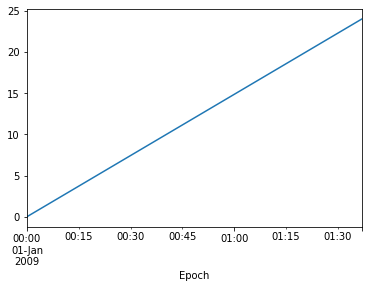

In [18]:
inst['mlt'].plot()
